# Lecture 10: Groups

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Prediction

In [2]:
# read family heights data from CSV file
families = Table.read_table('family_heights.csv')
families

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


This is an old, classic data set. Each family consists of two parents of opposite genders and their biological children. The data for each family are spread over multiple rows, depending on the number of children (one row per child in the family). Columns at indexes 1, 2, and 3 are heights (in inches).

**Question**: Do we understand all the columns? 

We're wondering if there is an association between parent heights and child heights, but there are two parent heights for each child height. To simplify the situation, let's add a column for 'Parent Average', the average height of the parents. Then we can look for an association between 'parent_avg' and 'child' heights.

In [4]:
# Calculate an array of values for the new 'Parent Average' column
parent_avgs = (families.column('father') + families.column('mother')) / 2
parent_avgs[0:10]  # a slice, the first 10 values in the array

array([ 72.75,  72.75,  72.75,  72.75,  71.  ,  71.  ,  71.  ,  71.  ,
        69.5 ,  69.5 ])

Use the `families` table and the `parent_avgs` array to build a new table, `heights`, with columns labeled as follows:

  - `Parent Average`
  - `Child`
  - `Sex`

In [5]:
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
    'Sex', families.column('sex')
)
heights

Parent Average,Child,Sex
72.75,73.2,male
72.75,69.2,female
72.75,69,female
72.75,69,female
71,73.5,male
71,72.5,male
71,65.5,female
71,65.5,female
69.5,71,male
69.5,68,female


Draw a scatterplot to check for an association between 'Parent Average' and 'Child' heights.

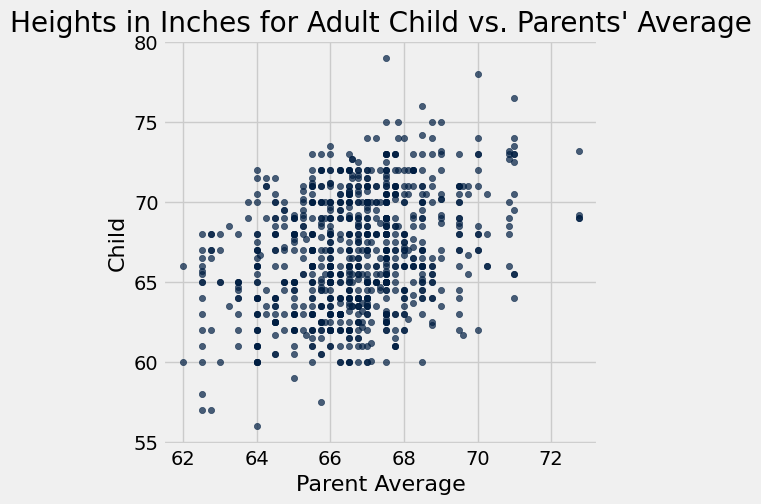

In [6]:
heights.scatter('Parent Average', 'Child')
plots.title("Heights in Inches for Adult Child vs. Parents' Average");

Do we see any association between the variables in this scatterplot? 



Suppose some parents from long ago had an average height between them of 68 inches, and they wanted to use this data to predict the adult height of their child. What would you tell them?

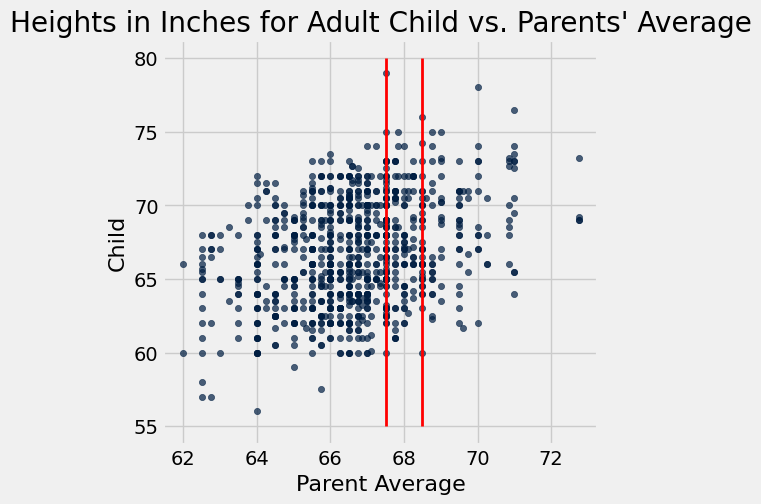

In [7]:
# It might help to focus our attention on the dots for long-ago parents with
# average height within 0.5 inches of 68
heights.scatter('Parent Average', 'Child')
plots.title("Heights in Inches for Adult Child vs. Parents' Average");

# x-y data for two points lying on a vertical line x = 67.5
xs = [67.5, 67.5]
ys = [55, 80]

plots.plot(xs, ys, color='red', lw=2);
xs = [68.5, 68.5]
plots.plot(xs, ys, color='red', lw=2);

The parents pressure us to provide a single height number, predicting the adult height of their child, based only on these data and the fact that the parents' average height is around 68 inches. So, we decide to find the average height for all the 'Child' values from the scatterplot dots which fall between the two red lines shown above.

Let's see how to find that average.

In [9]:
# Focus on the rows where Parent Average is between (68 - 0.5) and (68 + 0.5)
nearby = heights.where('Parent Average', are.between(67.5, 68.5))
nearby

Parent Average,Child,Sex
68,74,male
68,70,male
68,68,female
68,67,female
68,67,female
68,66,female
68,63.5,female
68,63,female
67.5,65,female
68.1,62.7,female


In [10]:
# Find the mean of the 'Child' column in the `nearby` table
nearby_mean = np.mean(nearby.column('Child'))
nearby_mean

67.620000000000005

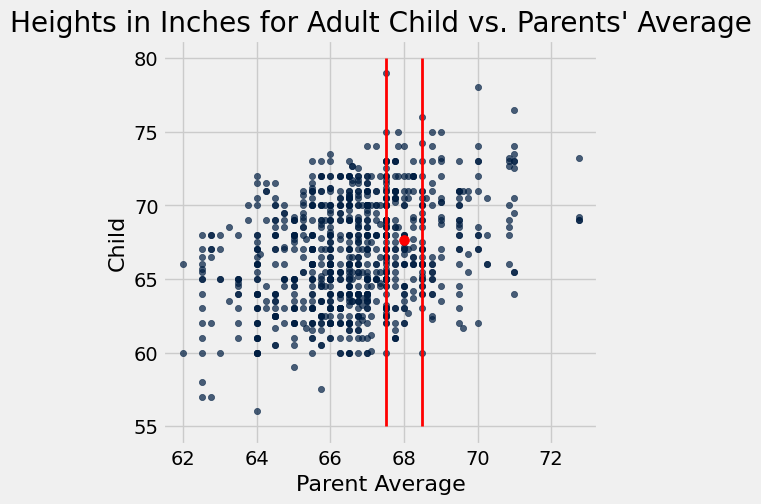

In [11]:
# Redraw the previous scatterplot with a big red dot indicating the
# point (68, nearby_mean)
heights.scatter('Parent Average', 'Child')
plots.title("Heights in Inches for Adult Child vs. Parents' Average");

# vertical lines
xs = [67.5, 67.5]
ys = [55, 80]
plots.plot(xs, ys, color='red', lw=2);
xs = [68.5, 68.5]
plots.plot(xs, ys, color='red', lw=2);

# big red dot
plots.scatter(68, nearby_mean, color='red', s=50);

Should we confidently tell the parents, "Your child will be 67.62 inches tall when they grow up"?

Now imagine that many pairs of parents want our advice on predicting the adult heights of their children. Instead of repeating all the above codes, with slight variations, for each pair of parents, we decide to define a function that will generalize the above computation: it will take the average height of the parents and return the `nearby_mean` child height as its prediction.

In [13]:
# Define the new function; name it `predict` since its job is to make a prediction
def predict(parent_avg):
    nearby = heights.where('Parent Average', are.between(parent_avg - 0.5, parent_avg + 0.5))
    nearby_mean = np.mean(nearby.column('Child'))
    return nearby_mean

# Call the function with the argument 68; it should return the familiar 67.62 answer
print(predict(68))

# If we pass in the argument 70, we should get a slightly larger prediction
print(predict(70))

67.62
68.5619047619


What happens if we try to predict for parents with average height equal to 72 inches?

In [14]:
predict(72)

/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan

What happens if we use `apply`, as follows? What type of result is returned by `t.apply`?

In [15]:
predicted_heights = heights.apply(predict, 'Parent Average')
predicted_heights

array([ 70.1       ,  70.1       ,  70.1       ,  70.1       ,
        70.41578947,  70.41578947,  70.41578947,  70.41578947,
        68.5025    ,  68.5025    ,  68.5025    ,  68.5025    ,
        68.5025    ,  68.5025    ,  68.5025    ,  66.48230453,
        66.48230453,  66.48230453,  66.48230453,  66.48230453,
        66.48230453,  70.41578947,  70.41578947,  70.41578947,
        70.41578947,  70.41578947,  70.41578947,  70.41578947,
        69.285     ,  69.285     ,  69.285     ,  69.285     ,
        68.66052632,  67.62      ,  67.62      ,  67.62      ,
        67.62      ,  67.62      ,  67.62      ,  67.62      ,
        67.62      ,  67.46184211,  68.56190476,  68.56190476,
        68.56190476,  68.56190476,  68.66052632,  68.66052632,
        68.66052632,  67.9880597 ,  67.9880597 ,  67.9880597 ,
        67.9880597 ,  67.9880597 ,  67.9880597 ,  67.9880597 ,
        67.9880597 ,  67.9880597 ,  68.05465116,  68.05465116,
        68.05465116,  68.05465116,  68.05465116,  68.05

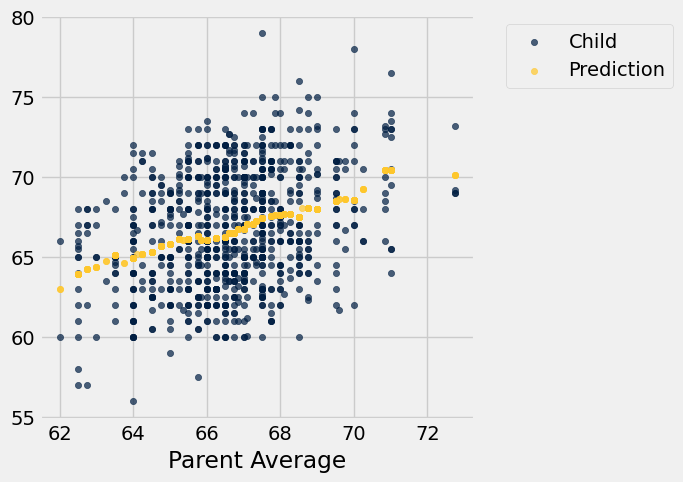

In [16]:
# Add a 'Prediction' column to our heights table
heights = heights.with_column('Prediction', predicted_heights)

# Select the columns 'Parent Average', 'Child', and 'Prediction' and use
# that result to make a new scatterplot. We refer to the yellow dots in the chart
# as a "Graph of Averages"
heights.select('Parent Average', 'Child', 'Prediction').scatter(0)

We say that the original scatterplot ('Child' versus 'Parent Average') shows a **linear association**, because the graph of averages is roughly linear. 

Later in the course, we'll learn how to find the "regression line" (the line suggested by the graph of averages for a linear association) and how to use it to make predictions.

## Prediction Errors

To get a feeling for how accurate our predictions are, we can calculate the differences between the actual heights for the adult children and the predicted heights. **Define a function** which takes two numbers and returns their difference.

In [19]:
def diff(a, b):
    ''' Takes two numbers and returns their difference.'''
    return a - b

In [23]:
# Find the prediction errors (`pred_errs`) using apply and difference
# Note: prediction error = prediction - actual (not actual - prediction)
pred_errs = heights.apply(diff, 'Prediction', 'Child')

# Add a new column, 'Errors', to the heights table
heights = heights.with_columns('Errors', pred_errs)
heights.show(6)

Parent Average,Child,Sex,Prediction,Errors
72.75,73.2,male,70.1,-3.1
72.75,69.2,female,70.1,0.9
72.75,69,female,70.1,1.1
72.75,69,female,70.1,1.1
71,73.5,male,70.4158,-3.08421
71,72.5,male,70.4158,-2.08421


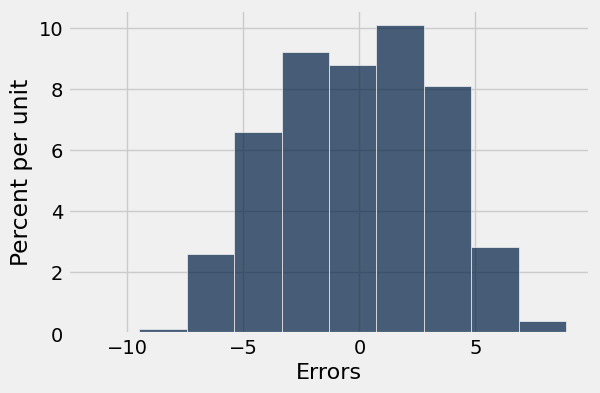

In [24]:
# Draw a histogram to visualize the distribution of 'Errors'
heights.hist('Errors')

Because we used average Parent heights to make our predictions, we are not surprised to see that the predictions are too large (positive error) about as often as they are too small (negative error).

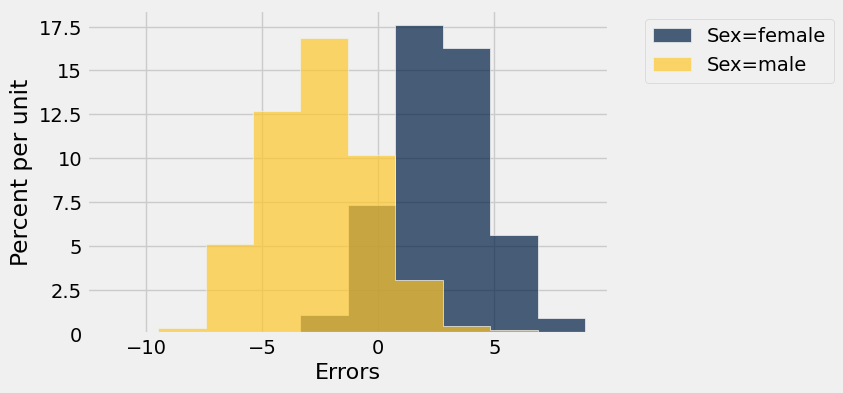

In [25]:
# Is there a relationship between 'Errors' and 'Sex'? 
# Draw an overlaid histogram to investigate this question.
heights.hist('Errors', group='Sex')

Discuss with your neighbor: What does this histogram tell us?

**Back to Slides**

## Discussion Question

We can make a *smarter* prediction by taking the child's sex into account.

In [26]:
# Our new function takes two arguments, the average height of the parents and 
# the sex of the child ('male' or 'female'), and returns the predicted Child height
def predict_smarter(parent_avg, sex):
    nearby = (
        heights.where('Parent Average', are.between(parent_avg - 0.5, parent_avg + 0.5))
        .where('Sex', sex)
    )
    nearby_mean = np.mean(nearby.column('Child'))
    return nearby_mean

In [27]:
predict_smarter(68, 'female')

64.983516483516482

In [28]:
predict_smarter(68, 'male')

70.172340425531914

In [29]:
smarter_predictions = heights.apply(predict_smarter, 'Parent Average', 'Sex')
heights = heights.with_column('Smarter Preds', smarter_predictions)
heights

Parent Average,Child,Sex,Prediction,Errors,Smarter Preds
72.75,73.2,male,70.1,-3.1,73.2
72.75,69.2,female,70.1,0.9,69.0667
72.75,69,female,70.1,1.1,69.0667
72.75,69,female,70.1,1.1,69.0667
71,73.5,male,70.4158,-3.08421,73.4889
71,72.5,male,70.4158,-2.08421,73.4889
71,65.5,female,70.4158,4.91579,67.65
71,65.5,female,70.4158,4.91579,67.65
69.5,71,male,68.5025,-2.4975,70.7955
69.5,68,female,68.5025,0.5025,65.7


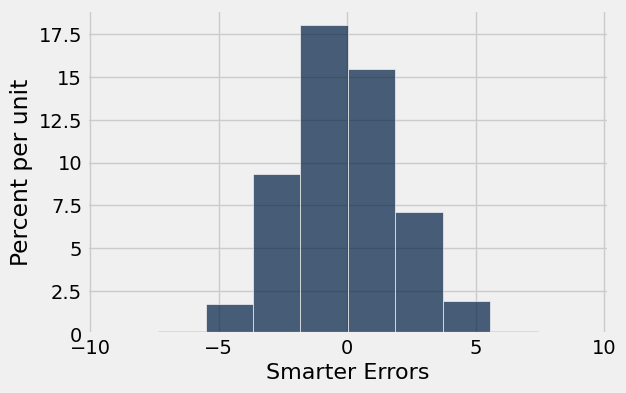

In [31]:
# If this is really a "smarter" prediction, the errors should be smaller
smart_errs = heights.apply(diff, 'Smarter Preds', 'Child')
heights = heights.with_column('Smarter Errors', smart_errs)

# Make a histogram of the 'Smarter Errors'
heights.hist('Smarter Errors')

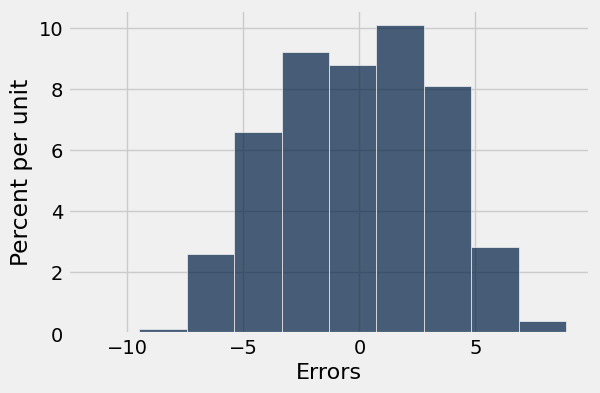

In [32]:
# The new errors are "smarter" because the values are more concentrated close to zero
# Remember the amount of spread in the original errors:
heights.hist('Errors')

Also, remember that with the original 'Errors', there was a pattern: the predictions for males were mostly negative, and the predictions for females were mostly positive.

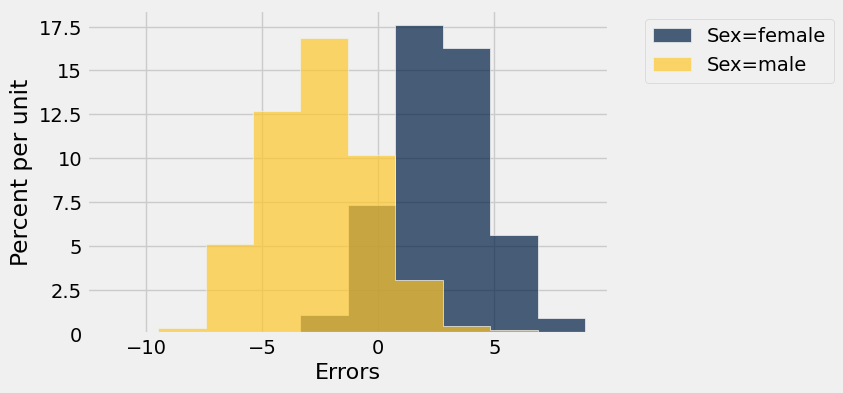

In [33]:
heights.hist('Errors', group='Sex')

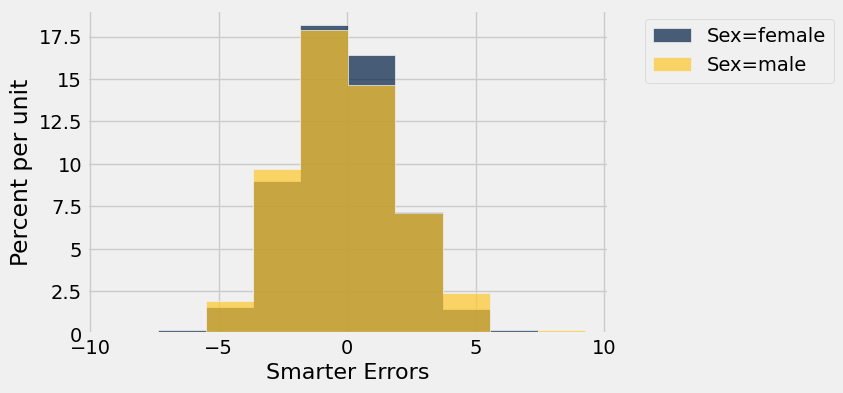

In [34]:
# Is that still true for 'Smarter Errors'?
heights.hist('Smarter Errors', group='Sex')

**Back to Slides**

## Grouping by One Column

In [35]:
# Load the `cones` table, which you saw in the reading; drop the 'Color'
cones = Table.read_table('cones.csv').drop('Color')
cones.show()

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


In [36]:
# Describe what happens when we simply group by one column
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


The values in the 'Flavor' column are now unique (no repeated values), and the 'Price' column has disappeared. Instead, we have a 'count' column, reminding us how many rows in the original table had a particular flavor value.

In [37]:
# What if we wanted to list the prices for each flavor?
cones.group('Flavor', list)

Flavor,Price list
bubblegum,[4.75]
chocolate,"[4.75, 5.25, 5.25]"
strawberry,"[3.5499999999999998, 5.25]"


In [38]:
# What if we wanted to show the average price for each flavor?
cones.group('Flavor', np.average)

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


In [39]:
# What if we wanted to show the smallest price for each flavor?
cones.group('Flavor', np.min).relabeled(1, 'Min Price')

Flavor,Min Price
bubblegum,4.75
chocolate,4.75
strawberry,3.55


Notice that the function named in the second argument is applied to **all other columns** except the column named in the first argument. If we add a 'Rating' column to our original cones table, we can show the average price and average rating for each flavor.

In [40]:
cones_rated = cones.with_column('Rating',make_array(4, 4, 2, 5, 5, 1))
cones_rated

Flavor,Price,Rating
strawberry,3.55,4
chocolate,4.75,4
chocolate,5.25,2
strawberry,5.25,5
chocolate,5.25,5
bubblegum,4.75,1


In [41]:
cones_rated.group('Flavor', np.average)

Flavor,Price average,Rating average
bubblegum,4.75,1
chocolate,5.08333,3.66667
strawberry,4.4,4.5


In [42]:
cones_rated.group('Flavor', list)

Flavor,Price list,Rating list
bubblegum,[4.75],[1]
chocolate,"[4.75, 5.25, 5.25]","[4, 2, 5]"
strawberry,"[3.5499999999999998, 5.25]","[4, 5]"


**Back to Slides**

## Grouping -- Survey Data

In [43]:
# These are the Data 8 "Welcome Survey" data from Spring 2022
survey = Table.read_table('welcome_survey_sp22.csv')
survey.show(3)

Year,Extroversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position,Pets,Piercings
Second,5,5,8,Left-handed,Left leg in first,On your left side,Ants,0
Fourth,2,3,7,Right-handed,Left leg in first,On your left side,"Beetles, Centipedes, Scorpions",0
First,3,4,8,Right-handed,Right leg in first,On your back,Bird,0


In [44]:
# If we group by Extroversion, we get a count for each unique value in that column
survey.group('Extroversion')

Extroversion,count
1,23
2,41
3,157
4,239
5,196
6,156
7,229
8,221
9,54
10,27


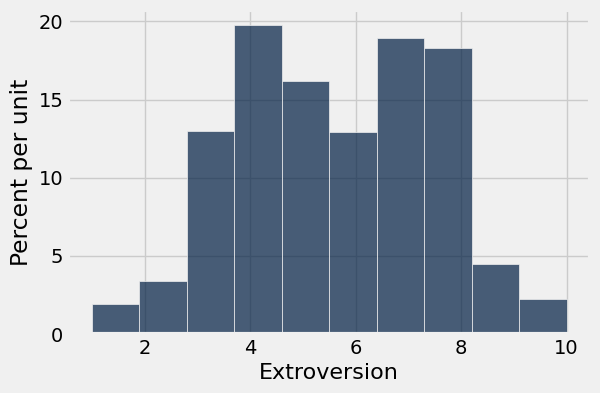

In [45]:
# We can visualize this distribution with a histogram
survey.hist('Extroversion')

In [46]:
# We can calculate averages "by Extroversion" for all the other numerical columns
survey.group('Extroversion', np.average)

Extroversion,Year average,Number of textees average,Hours of sleep average,Handedness average,Pant leg average,Sleep position average,Pets average,Piercings average
1,,2.08696,7.32609,,,,,0.478261
2,,3.21951,7.30488,,,,,0.95122
3,,4.71338,7.17516,,,,,1.57962
4,,4.96653,7.25941,,,,,1.7113
5,,5.39796,7.06888,,,,,1.45408
6,,5.8141,7.125,,,,,1.83974
7,,8.15721,7.04367,,,,,2.06987
8,,7.95475,7.07692,,,,,2
9,,10.7778,7.15741,,,,,2.88889
10,,13.037,7.16667,,,,,1.92593


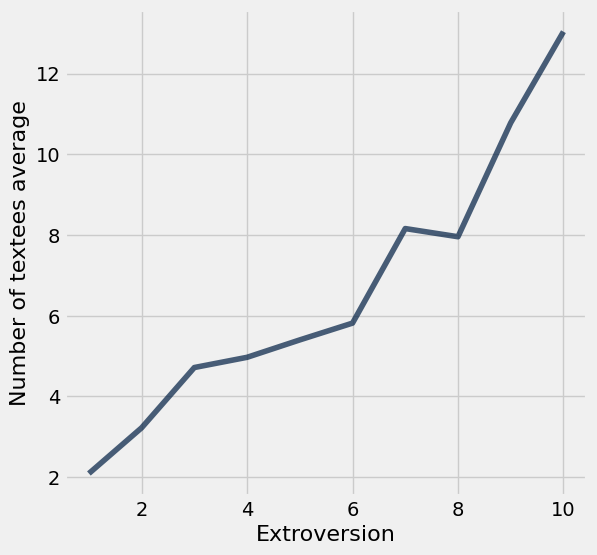

In [47]:
# It looks like students who rated themselves as more extroverted
# tend to have more "textees"
by_extra = survey.group('Extroversion', np.average)
by_extra.plot(0, 2)

In [48]:
# We can group by "Year" and find the average hours of sleep for each group
survey.select("Year", "Hours of sleep").group("Year", np.average)

Year,Hours of sleep average
Fifth or above,7.38889
First,7.19757
First year In Master's Degree,8
Fourth,6.92188
"I dont understand this question, I'm a first year but se ...",8.5
Junior Transfer,6.5
Not an undergrad,7
Second,7.1778
Third,6.96696


In [49]:
undergrad_years = make_array('First', 'Second', 'Third', 'Fourth', 'Fifth or above')
undergrad_years

array(['First', 'Second', 'Third', 'Fourth', 'Fifth or above'],
      dtype='<U14')

In [50]:
# We can group by "Year" and find the average hours of sleep for each group,
# focusing only on the undergrads
undergrads = survey.where('Year', are.contained_in(undergrad_years))
undergrads.select("Year", "Hours of sleep").group("Year", np.average)

Year,Hours of sleep average
Fifth or above,7.38889
First,7.19757
Fourth,6.92188
Second,7.1778
Third,6.96696


In [51]:
# We can assign number codes for year and then sort by that code to organize the rows
def get_yr_code(year_string):
    if year_string == 'First':
        return 1
    if year_string == 'Second':
        return 2
    if year_string == 'Third':
        return 3
    if year_string == 'Fourth':
        return 4
    if year_string == 'Fifth or above':
        return 5
    else:
        return None  # Should not happen
year_code = undergrads.apply(get_yr_code, 'Year')
undergrads = undergrads.with_column('Year_code', year_code)
undergrads_sorted = undergrads.select('Year_code', 'Hours of sleep').sort('Year_code')
undergrads_sorted.group('Year_code', np.mean)

Year_code,Hours of sleep mean
1,7.19757
2,7.1778
3,6.96696
4,6.92188
5,7.38889


## Grouping by Two Columns (aka Cross-Classification)

We're going to group the survey data by two columns, 'Handedness' and 'Sleep position'. It's a good idea to first group by each column individually, to familiarize ourselves with the distributions of those variables.

In [52]:
survey.group('Handedness')

Handedness,count
Both,9
Left-handed,93
Right-handed,1241


In [53]:
survey.group('Sleep position')

Sleep position,count
On your back,316
On your left side,346
On your right side,485
On your stomach,196


There are 3 unique values for 'Handedness' and 4 for 'Sleep position'. 

  - How many rows might we get when we group on both variables simultaneously?
  - Is there an association between handedness (right/left) and preferred side for sleeping (right/left)?

In [54]:
# Notice the syntax: The two column labels are put into a list, and that list
# is the first argument to `group`
survey.group(['Handedness', 'Sleep position']).show()

Handedness,Sleep position,count
Both,On your back,2
Both,On your left side,1
Both,On your right side,3
Both,On your stomach,3
Left-handed,On your back,15
Left-handed,On your left side,30
Left-handed,On your right side,31
Left-handed,On your stomach,17
Right-handed,On your back,299
Right-handed,On your left side,315


In [55]:
# to answer the second question, focus on just the 4 relevant rows
survey.group(['Handedness', 'Sleep position']).take(5, 6, 9, 10)

Handedness,Sleep position,count
Left-handed,On your left side,30
Left-handed,On your right side,31
Right-handed,On your left side,315
Right-handed,On your right side,451


Leftie side-sleepers are almost evenly split between preferring to sleep on one side or the other. Rightie side-sleepers seem to be somewhat more inclined to sleep on their right.

We can also include a second argument (an aggregating function). Check this out:

In [56]:
survey.group(['Handedness', 'Sleep position'], np.average).show()

Handedness,Sleep position,Year average,Extroversion average,Number of textees average,Hours of sleep average,Pant leg average,Pets average,Piercings average
Both,On your back,,7,6,5,,,4.5
Both,On your left side,,7,10,6,,,0
Both,On your right side,,7.66667,7.33333,8.16667,,,2
Both,On your stomach,,6,7,8.33333,,,0
Left-handed,On your back,,4.93333,5.6,7.06667,,,2.26667
Left-handed,On your left side,,5.76667,6.13333,6.96667,,,1.8
Left-handed,On your right side,,6.25806,7.3871,7.04839,,,1.3871
Left-handed,On your stomach,,6.17647,7.11765,7.5,,,1.70588
Right-handed,On your back,,5.48161,5.75251,7.11538,,,1.34114
Right-handed,On your left side,,5.55556,6.70476,7.11905,,,1.76825


Hmm. Looks like Data 8 students who are ambidextrous and sleep on their backs tend to have a lot of piercings! At least, it was true in Spring 2022, according to the survey responses.

## Have a Great Weekend!